In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('USA_cars_datasets.csv')
data.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [3]:
data.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [4]:
data.shape

(2499, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   vin           2499 non-null   object 
 8   lot           2499 non-null   int64  
 9   state         2499 non-null   object 
 10  country       2499 non-null   object 
 11  condition     2499 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 234.4+ KB


In [6]:
data.describe()

,price,year,mileage,lot
count,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [7]:
data.isnull().sum()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

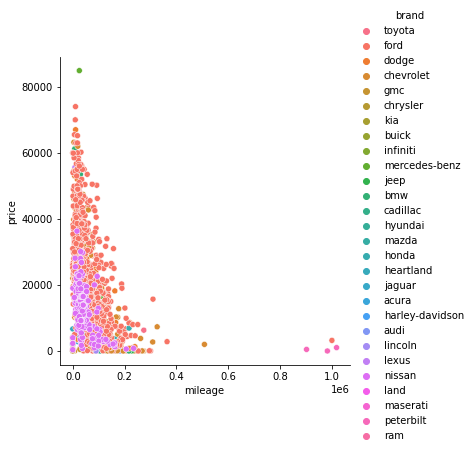

In [8]:
sns.relplot(x = 'mileage',y = 'price',kind = 'scatter',hue = 'brand',data = data)

In [9]:
data['country'].unique()

array([' usa', ' canada'], dtype=object)

<AxesSubplot:>

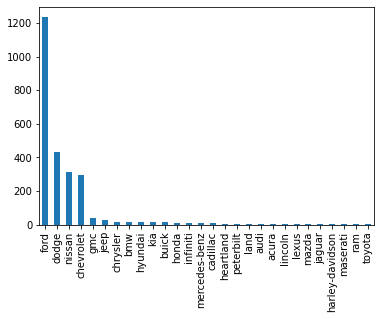

In [10]:
data['brand'].value_counts().plot.bar()

<AxesSubplot:xlabel='price', ylabel='Density'>

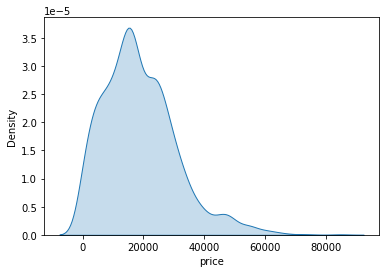

In [11]:
sns.kdeplot(data = data['price'],label = 'price',shade = True)

<AxesSubplot:>

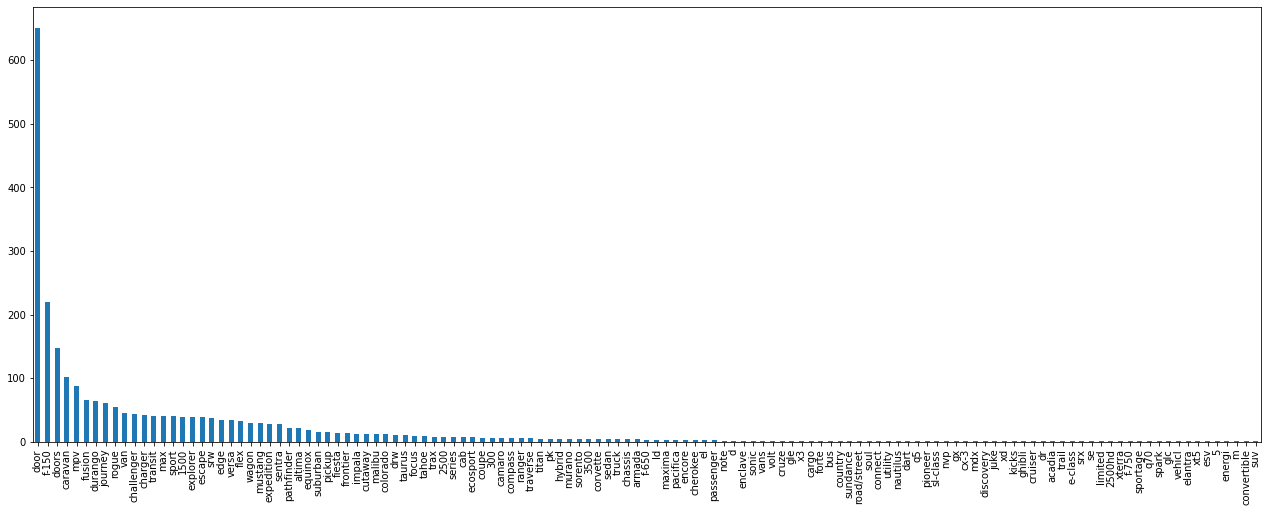

In [12]:
plt.figure(figsize = (22,8))
data['model'].value_counts().plot.bar()

In [13]:
data['brand'][data['price']==max(data['price'])]

502    mercedes-benz
Name: brand, dtype: object

<AxesSubplot:xlabel='brand'>

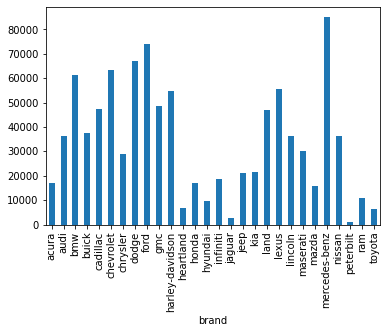

In [14]:
data.groupby('brand')['price'].max().plot(kind = 'bar')


In [15]:
data['title_status'].unique()

array(['clean vehicle', 'salvage insurance'], dtype=object)

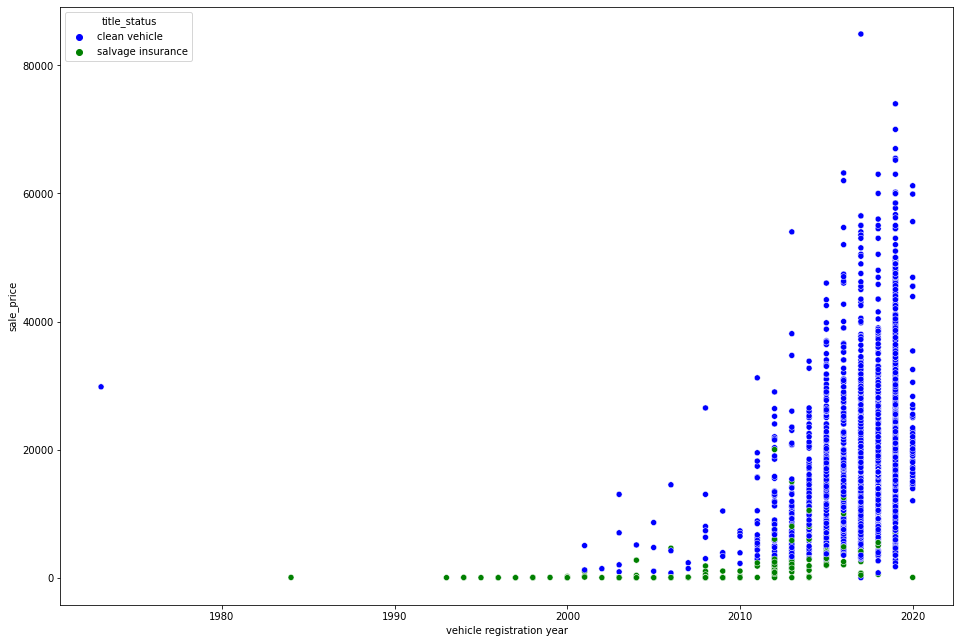

In [16]:
custom_palette = ['blue','green','orange','red','yellow','purple']
sns.set_palette(custom_palette)
fig,ax = plt.subplots(figsize = (16,11))
sns.scatterplot(x = 'year',y = 'price',hue = 'title_status',data = data,ax = ax)
ax.set_xlabel("vehicle registration year")
ax.set_ylabel('sale_price')
plt.show()

In [17]:
top_five_color = list(data['color'].value_counts()[0:5].index)

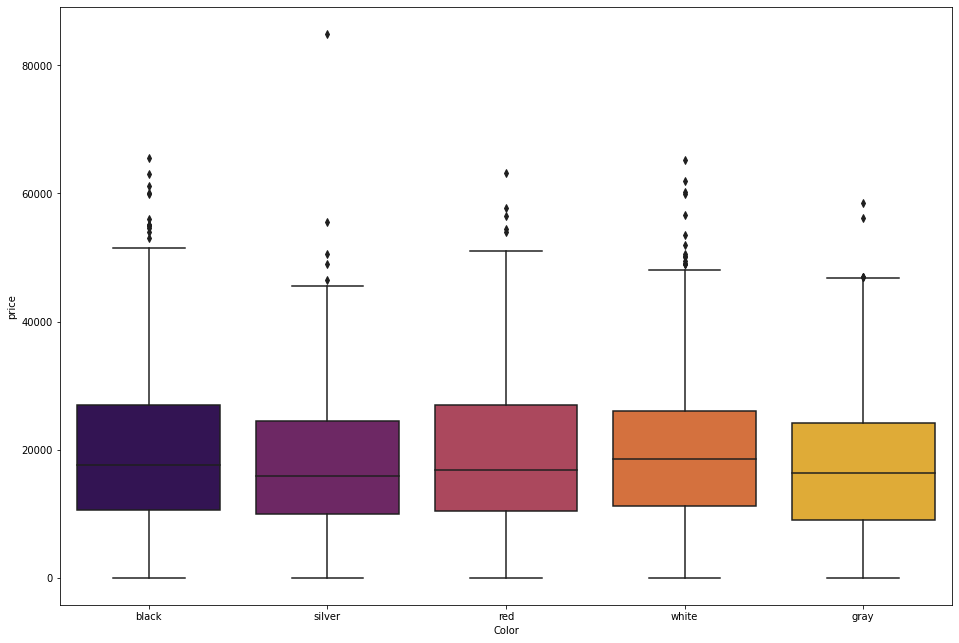

In [18]:
data_top_five_color =  data[data['color'].isin(top_five_color)]
fig, ax = plt.subplots(figsize = (16,11))
sns.boxplot(x = 'color',y = 'price',data = data_top_five_color,palette = 'inferno',ax = ax)
ax.set_xlabel('Color')
ax.set_ylabel('price')
plt.show()                            
                            
             

In [19]:
over_10_brands = data['brand'].value_counts()[data['brand'].value_counts()>=10].index

In [20]:
car_per_brand =  data[data['brand'].isin(over_10_brands)]

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 42.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWar

Text(0, 0.5, 'Brand')

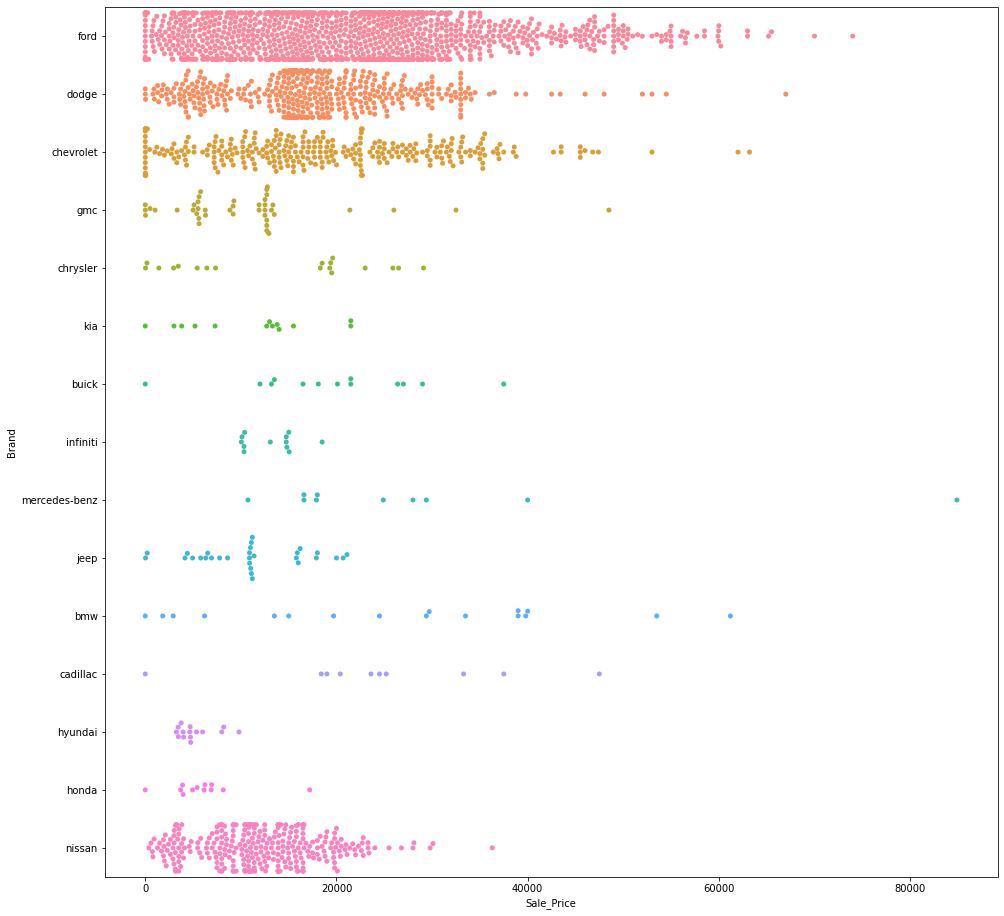

In [21]:
fig,ax = plt.subplots(figsize = (16,16))
sns.swarmplot(x = 'price',y = 'brand',data = car_per_brand,ax = ax)
ax.set_xlabel('Sale_Price')
ax.set_ylabel('Brand')

In [22]:
data['state'].value_counts()[data['state'].value_counts()>100].index

Index(['pennsylvania', 'florida', 'texas', 'california', 'michigan',
       'north carolina', 'minnesota', 'illinois'],
      dtype='object')

In [23]:
over_100_states = data['state'].value_counts()[data['state'].value_counts()>100].index

Text(0, 0.5, 'States')

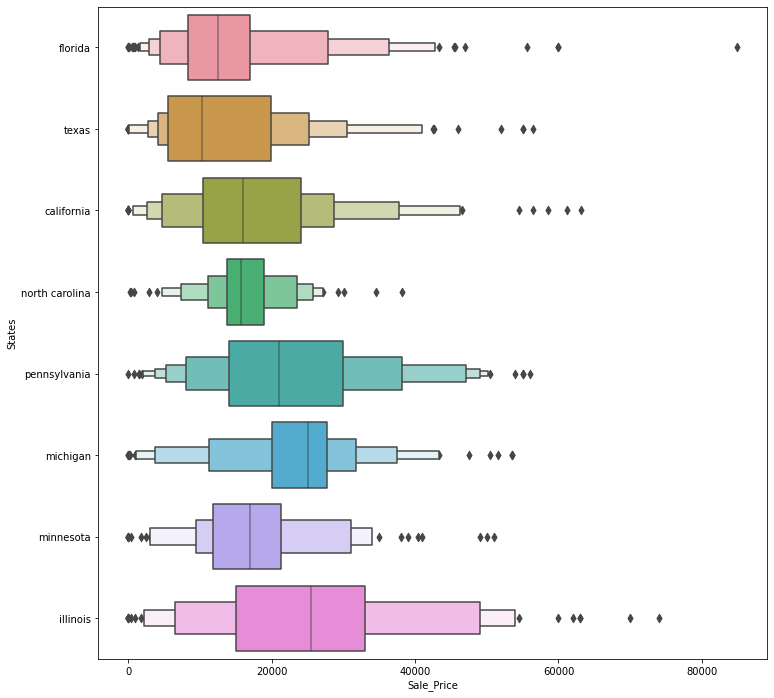

In [24]:
over_100_car_per_state = data[data['state'].isin(over_100_states)]
fig, ax = plt.subplots(figsize = (12,12))
sns.boxenplot(x = 'price',y = 'state',data = over_100_car_per_state, ax = ax)
ax.set_xlabel('Sale_Price')
ax.set_ylabel('States')

In [25]:
data['Current_Year']=2020

In [26]:
data['Age'] = data['Current_Year']-data['year']

In [27]:
data.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,Current_Year,Age
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left,2020,12
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left,2020,9
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,2020,2
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,2020,6
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,2020,2


In [28]:
data.drop(['year','Current_Year','vin','lot','condition','state','country'],axis = 1,inplace = True)

In [29]:
data.head()

,price,brand,model,title_status,mileage,color,Age
0,6300,toyota,cruiser,clean vehicle,274117.0,black,12
1,2899,ford,se,clean vehicle,190552.0,silver,9
2,5350,dodge,mpv,clean vehicle,39590.0,silver,2
3,25000,ford,door,clean vehicle,64146.0,blue,6
4,27700,chevrolet,1500,clean vehicle,6654.0,red,2


<AxesSubplot:>

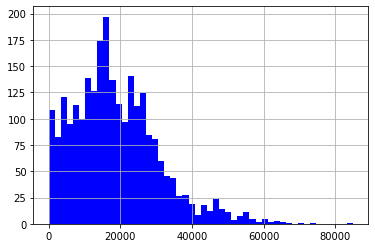

In [30]:
data['price'].hist(bins = 50)

<AxesSubplot:>

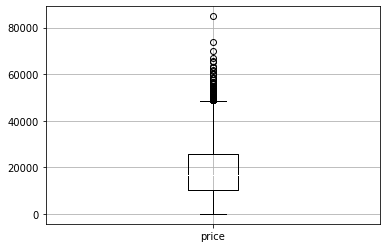

In [31]:
data.boxplot(['price'])

In [32]:
data['price'].describe()

count     2499.000000
mean     18767.671469
std      12116.094936
min          0.000000
25%      10200.000000
50%      16900.000000
75%      25555.500000
max      84900.000000
Name: price, dtype: float64

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

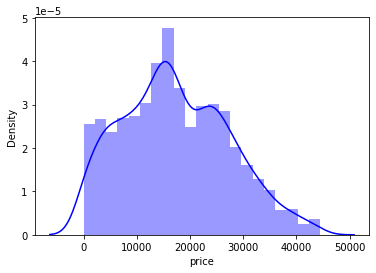

In [38]:
sns.distplot(data['price'])

In [39]:
len(data[data.price > 45000]) 

0

In [40]:
len(data[data.price > 45000]) / len(data)

0.0

In [41]:
data = data[data.price < 45000]
len(data)

2394

Text(0.5, 1.0, 'Price Distribution Without Outliers')

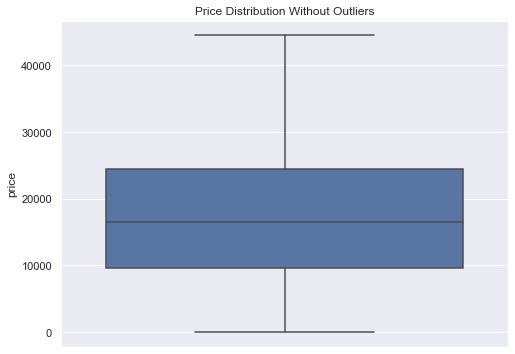

In [42]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,6))
sns.boxplot(y='price', data=data).set_title("Price Distribution Without Outliers")

<AxesSubplot:>

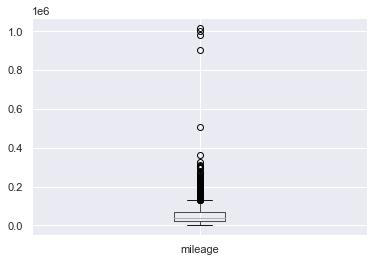

In [43]:
data.boxplot(['mileage'])

In [44]:
IQR = data.mileage.quantile(0.75)-data.mileage.quantile(0.25)
IQR

43686.5

In [45]:
lower_bridge = data['mileage'].quantile(0.25)-(IQR*3)
upper_bridge = data['mileage'].quantile(0.75)+(IQR*3)
print(lower_bridge),print(upper_bridge)

-108196.5
197609.0


(None, None)

In [46]:
price_estimator_df = data.copy()
price_estimator_df.loc[data['mileage']>=197609,'mileage']=197609

<AxesSubplot:>

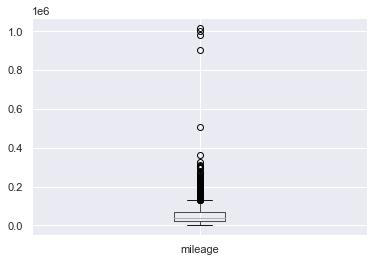

In [47]:
data.boxplot(['mileage'])

In [48]:
price_estimator_df.head()

,price,brand,model,title_status,mileage,color,Age
0,6300,toyota,cruiser,clean vehicle,197609.0,black,12
1,2899,ford,se,clean vehicle,190552.0,silver,9
2,5350,dodge,mpv,clean vehicle,39590.0,silver,2
3,25000,ford,door,clean vehicle,64146.0,blue,6
4,27700,chevrolet,1500,clean vehicle,6654.0,red,2


In [49]:
cat_features = [col for col in price_estimator_df.select_dtypes('object')]
cat_features

['brand', 'model', 'title_status', 'color']

In [50]:
train = price_estimator_df.drop('price',axis=1)
target = price_estimator_df.price

In [53]:
!pip install xgboost
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict,GridSearchCV
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

  Using cached xgboost-1.3.3-py3-none-win_amd64.whl (95.2 MB)


In [54]:
[(col,train[col].nunique()) for col in cat_features]

[('brand', 27), ('model', 122), ('title_status', 2), ('color', 49)]

In [55]:
cat_transformer = LabelEncoder()

for col in cat_features:
    train[col] = cat_transformer.fit_transform(train[col])
train.head()

,brand,model,title_status,mileage,color,Age
0,26,25,0,197609.0,2,12
1,8,88,0,190552.0,39,9
2,7,72,0,39590.0,39,2
3,8,31,0,64146.0,4,6
4,5,0,0,6654.0,34,2


In [56]:
X_train,X_val,y_train,y_val = train_test_split(train,target,test_size=0.2,shuffle=True,random_state=20)

In [57]:
model = XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
r2_score(y_pred=model.predict(X_val),y_true=y_val)

0.6504437650346264

In [59]:
params_set1 = {'max_depth':[3,4,5],'gamma':[0,1,5]}

model = XGBRegressor()

clf = GridSearchCV(model,params_set1,cv=KFold(n_splits=5),scoring='r2',refit=True)
clf.fit(X_train,y_train)


display(clf.best_score_,clf.best_params_)

0.652508028154606

{'gamma': 0, 'max_depth': 4}

In [60]:
params_set2 = {'n_estimators':[50,100,500,1000],'learning_rate':[0.01,0.03,0.05]}

model = XGBRegressor(max_depth=4,gamma=0)

clf = GridSearchCV(model,params_set2,cv=KFold(n_splits=5),scoring='r2',refit=True)
clf.fit(X_train,y_train)


display(clf.best_score_,clf.best_params_)

0.6607939730036143

{'learning_rate': 0.05, 'n_estimators': 500}

In [61]:
model = XGBRegressor(gamma=0, max_depth= 4,learning_rate=0.03,n_estimators=1000)
model.fit(X_train,y_train)
r2_score(y_pred=model.predict(X_val),y_true=y_val)

0.6932339454542753

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf =  RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor()

In [63]:
r2_score(y_pred=model.predict(X_val),y_true=y_val)

0.6932339454542753